# Convolutional Neural Network - Getting Started

In this notebook we will look at how we can load one of the pre-trained models we talked about in class and run soem predictions on one of our own images

In [ ]:
from torchvision import datasets
from torchvision import models
from torchvision import transforms
import torch
import json
import re
from pprint import pprint
from torchsummary import summary

## Lets load a Resnet101 pretrained model

In [ ]:
model = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

### PyTorch Transforms

Pytorch Vision has multiple transforms that we can use together. We call `Compose` to chain them together

In [ ]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

### Loading an image
Lets load the same image of my puppy from the lecture

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd gdrive/My Drive/cs271p

/content/gdrive/My Drive/cs271p


In [ ]:
!ls

brave	   data       Heart_Disease.ipynb  imagenet_labels.txt	train-faces
brave.png  heart.csv  heart.gsheet	   images		val-faces


In [ ]:
img = Image.open('brave.png')

In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
img = img.convert('RGB')

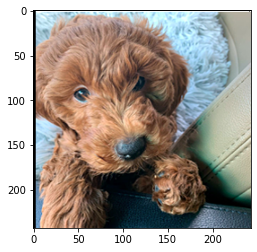

In [ ]:
plt.imshow(img)

Here we call pre process and the image will run through all the transforms

In [ ]:
imgt = preprocess(img)

In [ ]:
imgt.shape

torch.Size([3, 224, 224])

In [ ]:
batch = torch.unsqueeze(imgt, 0)

In [ ]:
batch.shape

torch.Size([1, 3, 224, 224])

Lets put the model in evaluation mode. Which eliminates the overhead of gradient optimizations

In [ ]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Next we perform inference to get the prediction.

In [ ]:
preds = model(batch)

### Model architecture

What does ResNet 101 look like

In [ ]:
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
preds.shape

torch.Size([1, 1000])

In [ ]:
preds

tensor([[-2.7718e+00, -2.6957e+00, -1.9430e+00, -2.6214e+00, -1.4525e+00,
         -4.1683e-01, -1.6968e+00, -2.1103e+00,  1.2689e+00, -9.2141e-01,
         -2.9374e+00, -2.6721e+00, -7.6663e-01, -4.4149e+00, -7.1154e-01,
         -9.6010e-01, -2.2758e+00,  8.4014e-02, -2.0827e+00, -2.1152e+00,
         -3.0684e+00, -1.1702e+00, -1.0722e+00, -6.4655e-01, -1.4861e+00,
         -2.2644e+00, -2.6711e+00, -1.8248e+00, -1.9224e+00, -2.4030e+00,
         -2.7546e+00, -2.8005e+00, -3.4182e-01, -3.9534e-01,  2.7136e-01,
         -1.2066e+00, -6.6917e-01, -5.7400e-01, -1.7461e+00, -3.6582e+00,
         -2.6371e+00, -1.6892e+00, -1.3408e-01, -1.9441e+00, -3.6243e+00,
         -1.4441e+00, -2.7756e+00, -3.1472e+00, -4.9043e+00, -3.2689e+00,
         -4.4231e+00,  2.7808e-01,  7.7768e-01,  9.6495e-01,  8.2468e-01,
         -8.1938e-01, -2.5723e+00, -1.0277e+00, -1.6478e+00, -1.9909e+00,
          1.2996e-01, -1.8753e+00, -3.8286e-01, -1.7280e+00,  1.0585e-01,
          4.8735e-01, -4.5497e-01, -8.

### ImageNet Classes
Next we load the 1000 image classes of ImageNet to see what we predicted

In [ ]:
classes = dict()
with open('imagenet_labels.txt', 'r') as f:
    for line in f.readlines():
        parts = line.split(':')
        classes[int(parts[0])] = re.sub("'|\n", '', parts[1])

Next we get the maximum predicted value

In [ ]:
_, pred = torch.max(preds, 1)

In [ ]:
pred

tensor([266])

### Lets use Softmax to generate the classifications

In [ ]:
confidence = torch.nn.functional.softmax(preds, dim=1)[0] * 100

In [ ]:
classes[int(pred[0])]

' miniature poodle'

In [ ]:
confidence[pred[0]].item()

66.36062622070312

What about reviewing the top 5 probabilities

In [ ]:
_, indices = torch.sort(preds, descending=True)
[(classes[int(idx)], confidence[int(idx)].item()) for idx in indices[0][:5]]

[(' miniature poodle', 66.36062622070312),
 (' toy poodle', 28.16963768005371),
 (' cocker spaniel English cocker spaniel cocker', 2.073974132537842),
 (' standard poodle', 1.2798702716827393),
 (' Irish setter red setter', 0.4279777407646179)]

### Lets look at visualizing our feature maps

In [ ]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

model.conv1.register_forward_hook(get_activation('conv1'))
output = model(batch)

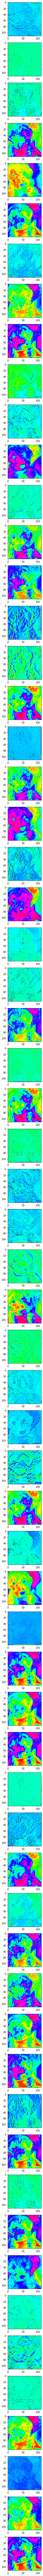

In [ ]:
act = activation['conv1'].squeeze()
fig, axarr = plt.subplots(act.size(0), figsize=(200,200))
for idx in range(act.size(0)):
  axarr[idx].imshow(act[idx], cmap='hsv')

In [ ]:
for idx in range(act.size(0)):
  plt.imsave(f'brave/{idx}.png', act[idx], cmap='hsv')


# Excercises

1. Try a different model
2. Try a different dataset
3. Feed in your own model
4. See if you can fool the neural network with images outside of the dataset labels